<a href="https://colab.research.google.com/github/americofreitasjr/AnaliseSegurancaPublicaRJ/blob/master/Step_4_Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice



1.   [Step_1_Carregando_a_base_do_ISP](Step_1_Carregando_a_base_do_ISP.ipynb)
2.   [Step_2_ISP_Analise_Exploratoria](Step_2_ISP_Analise_Exploratoria.ipynb)
3.   [Step_3_ISP_estudo_da_serie_historica](Step_3_ISP_estudo_da_serie_historica.ipynb)
4.   [Step_4_Serie_Temporal](Step_4_Serie_Temporal.ipynb)





#Modelando a série temporal de roubo a veiculos e a ST de emprego


Importando e instalando os pacotes

In [0]:
!sudo apt-get install r-cran-rmysql

In [0]:
system("sudo apt-get install r-cran-rmysql")

In [0]:
options(warn=-1)

requiredPackages = c('BETS','forecast')
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) suppressMessages(suppressWarnings(install.packages(p)))
  suppressMessages(suppressWarnings(library(p,character.only = TRUE)))
}

Loading required package: BETS


In [0]:
options(warn=0)
load(file="df_isp.RData")

In [3]:
head(df_isp)

controle,ano,MES,titulo_do,total_rbft,conteudo,DP,cisp,data_com,data_fato,⋯,municipio_fato,aisp,RISP,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit
<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
00132271-2010,2010,janeiro,Furto a transeunte,Furto,casos,012a. Copacabana,12,1/01/2010,1/01/2010,⋯,Rio de Janeiro,AISP 19,RISP 01,não se aplica,,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica
00176671-2010,2010,janeiro,Ameaça,não se aplica,vítimas,034a. Bangu,34,1/01/2010,1/01/2010,⋯,Rio de Janeiro,AISP 14,RISP 02,feminino,19/04/1978,parda,Do lar,Companheiro(a),SANTA CRUZ,RIO DE JANEIRO
00176671-2010,2010,janeiro,Lesão corporal dolosa,não se aplica,vítimas,034a. Bangu,34,1/01/2010,1/01/2010,⋯,Rio de Janeiro,AISP 14,RISP 02,feminino,19/04/1978,parda,Do lar,Companheiro(a),SANTA CRUZ,RIO DE JANEIRO
00490161-2010,2010,janeiro,Roubo de aparelho celular,Roubo,casos,023a. Meier,23,1/01/2010,1/01/2010,⋯,Rio de Janeiro,AISP 03,RISP 01,não se aplica,,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica
00788311-2010,2010,janeiro,Roubo a transeunte,Roubo,casos,005a. Mem de Sá,5,1/01/2010,1/01/2010,⋯,Rio de Janeiro,13,RISP 01,não se aplica,,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica
00903971-2010,2010,janeiro,Roubo de veículo,Roubo,casos,021a. Bonsucesso,21,1/01/2010,1/01/2010,⋯,Rio de Janeiro,AISP 22,RISP 01,não se aplica,,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica


In [4]:
summary(df_isp)

          controle            ano            MES         
 96136441-2016:     58   Min.   :2010   março  : 503669  
 14903031-2013:     56   1st Qu.:2012   janeiro: 493114  
 83131641-2015:     56   Median :2014   maio   : 491771  
 27025371-2011:     54   Mean   :2014   agosto : 488192  
 30923051-2012:     51   3rd Qu.:2016   abril  : 482851  
 07411121-2015:     51   Max.   :2018   julho  : 479682  
 (Other)      :5650135                  (Other):2711182  
                              titulo_do               total_rbft     
 Lesão corporal dolosa             : 700874   Furto        :1495237  
 Ameaça                            : 657393   não se aplica:2777018  
 Roubo a transeunte                : 621249   Roubo        :1378206  
 Lesão corporal culposa de trânsito: 353511                          
 Furto (outros)                    : 308436                          
 Roubo de veículo                  : 288474                          
 (Other)                           :2720524   

In [0]:
df <- df_isp %>%
  filter(DP %in% c("Delegacia de Roubos e Furtos de Automóveis"))  %>%
  group_by(ano, MES) %>%
  do(data.frame(nrow=nrow(.)))

In [0]:
df$MesNum <- NA

df$MesNum[df$MES=="janeiro"] <- 1
df$MesNum[df$MES=="fevereiro"] <- 2
df$MesNum[df$MES=="março"] <- 3
df$MesNum[df$MES=="abril"] <- 4
df$MesNum[df$MES=="maio"] <- 5
df$MesNum[df$MES=="junho"] <- 6
df$MesNum[df$MES=="julho"] <- 7
df$MesNum[df$MES=="agosto"] <- 8
df$MesNum[df$MES=="setembro"] <- 9
df$MesNum[df$MES=="outubro"] <- 10
df$MesNum[df$MES=="novembro"] <- 11
df$MesNum[df$MES=="dezembro"] <- 12

df$ano <- factor(df$ano)

head(df)

In [9]:
df2 <- df %>%
  arrange(ano, MesNum)

head(df2)

ano,MES,nrow,MesNum
<fct>,<fct>,<int>,<dbl>
2010,janeiro,1341,1
2010,fevereiro,1196,2
2010,março,1450,3
2010,abril,1256,4
2010,maio,1270,5
2010,junho,1267,6


 Time-Series [1:105] from 2010 to 2019: 1256 1261 1183 1196 1341 1314 1267 1270 1450 1161 ...


ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

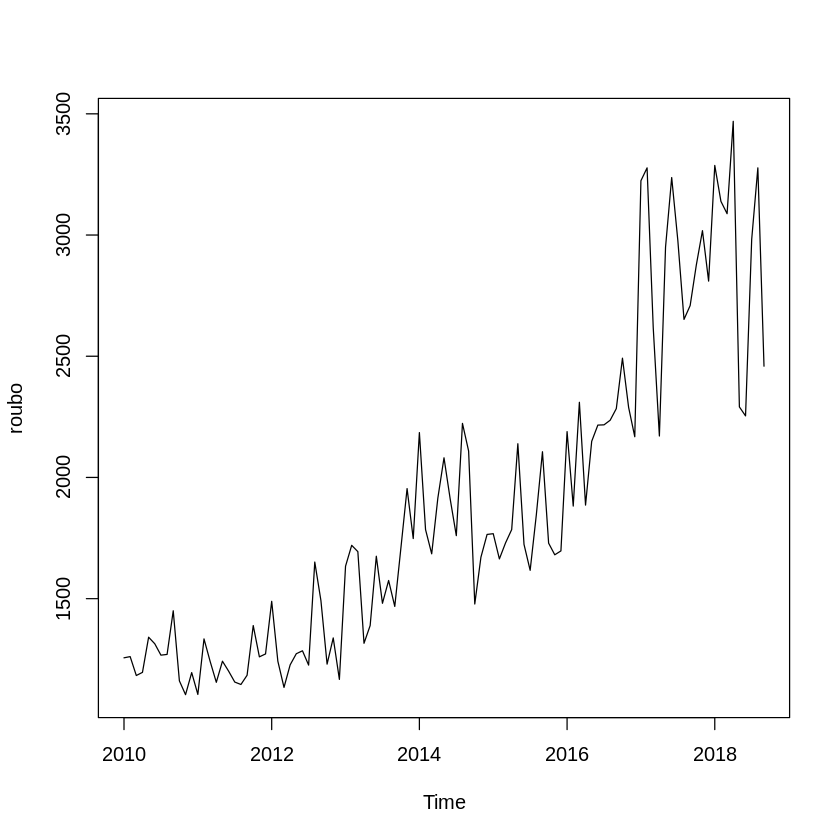

In [10]:
roubo <- ts(df$nrow, start = c(2010,1), frequency = 12)
plot(roubo)
str(roubo)
tail(roubo)

In [0]:
###################################
## Modelando somente e ST de roubo
###################################

# conjunto de teste e treinamento
training <- window(roubo, end = c(2017,12))
test <- window(roubo, start = c(2018,1))



	Ljung-Box test

data:  Residuals from Naive method
Q* = 62.483, df = 19, p-value = 1.556e-06

Model df: 0.   Total lags used: 19



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,16.35789,266.9632,194.8842,-0.08995964,10.64883,0.6200626,-0.20876240,NA
Test set,106.22222,446.8042,423.1111,1.26841570,14.95624,1.3462116,0.05867737,0.7762747


Warning message:
“Removed 1 rows containing missing values (geom_path).”

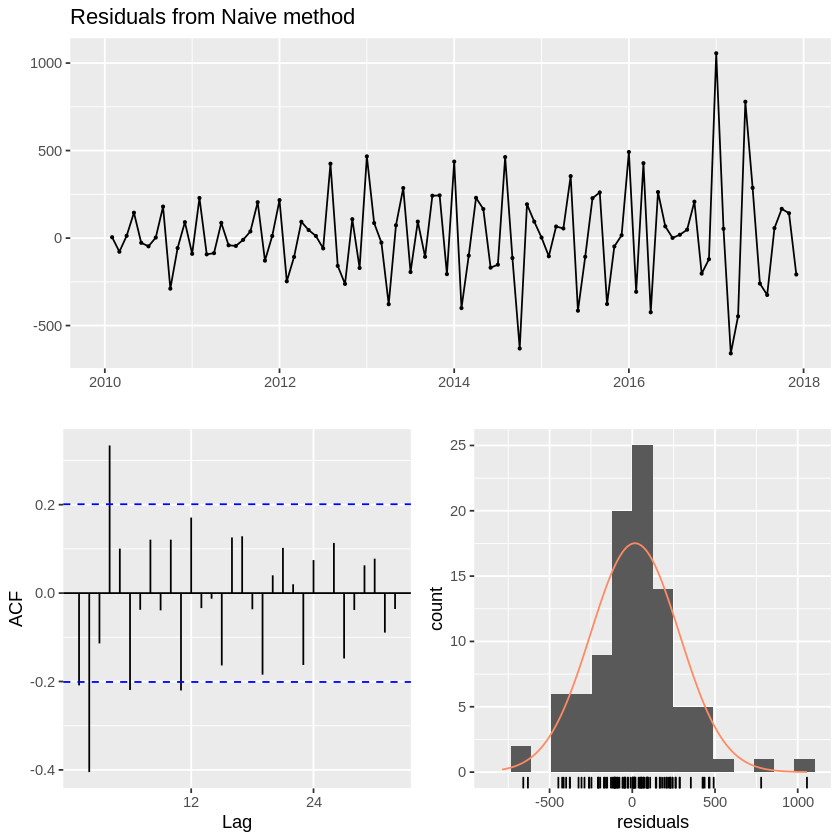

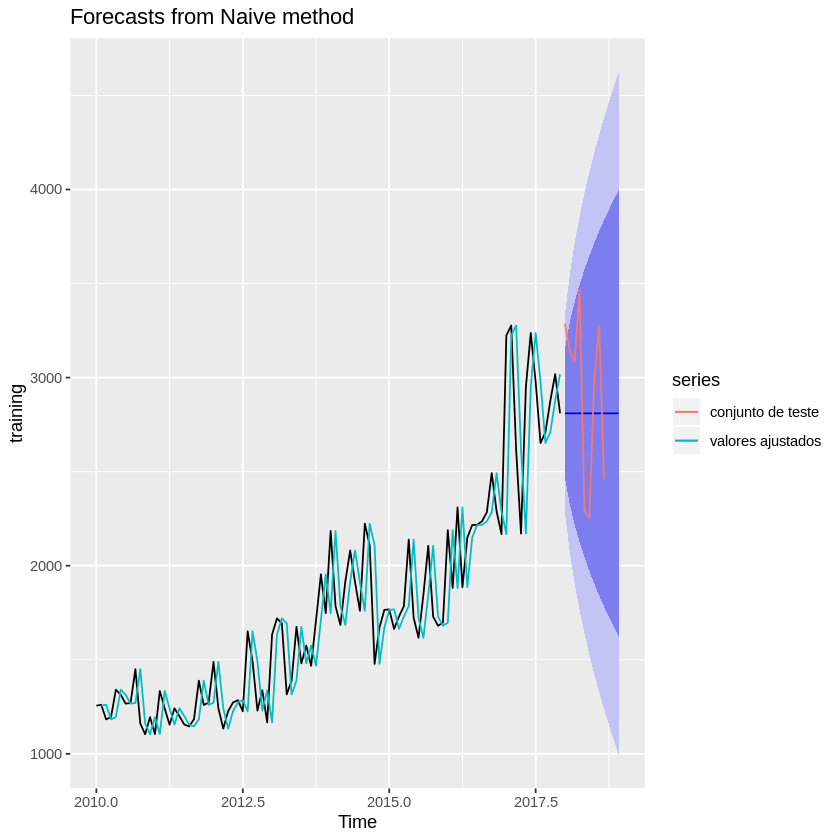

In [12]:
## Naive
fit.naive <- naive(training, h = 12) 
checkresiduals(fit.naive)
accuracy(fit.naive,test)
autoplot(fit.naive) + autolayer(test, series = "conjunto de teste") + 
  autolayer(fitted(fit.naive), series = "valores ajustados")


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 129.85, df = 19, p-value < 2.2e-16

Model df: 0.   Total lags used: 19



,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,232.39286,418.6553,314.2976,9.779096,15.45538,1.000000,0.57622252,NA
Test set,47.88889,648.2829,499.0000,-1.460574,17.85923,1.587667,0.03694839,1.23336


Warning message:
“Removed 12 rows containing missing values (geom_path).”

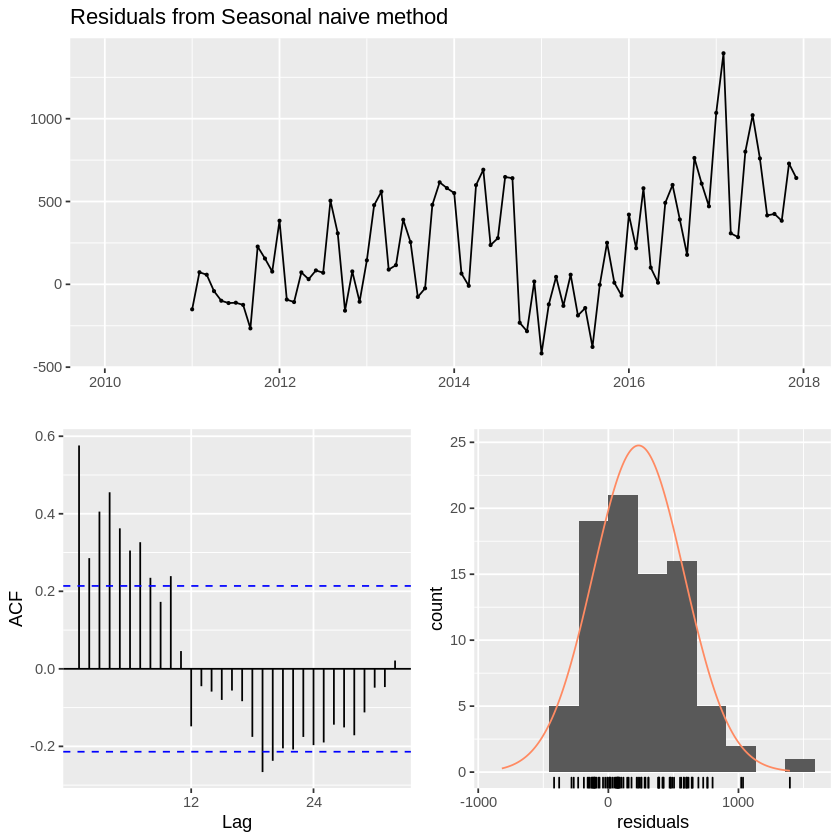

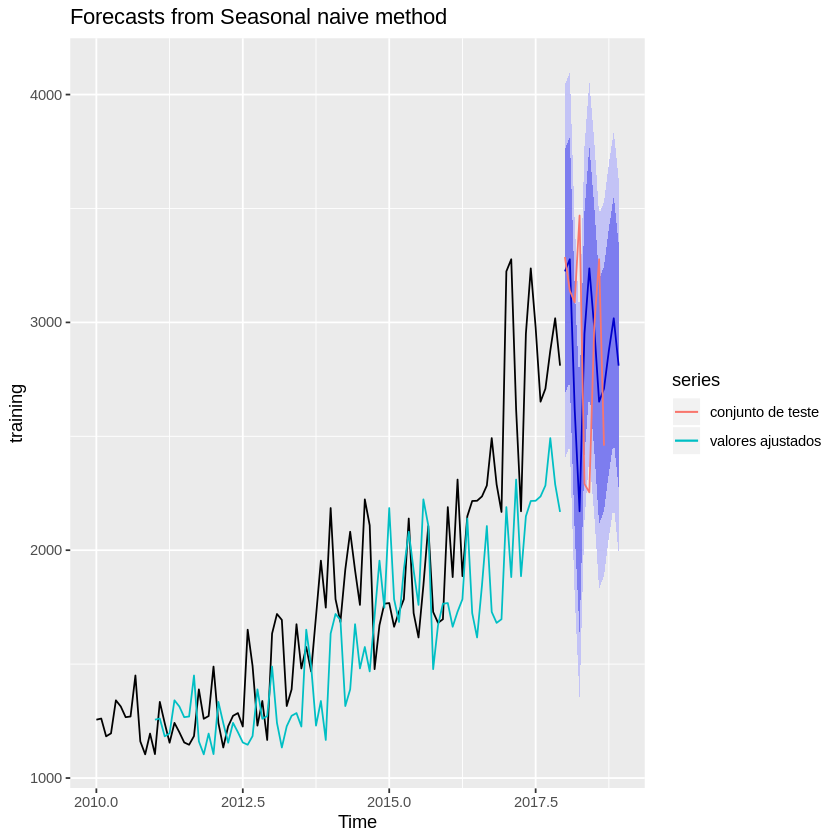

In [13]:

## SNaive
fit.snaive <- snaive(training, h = 12)
checkresiduals(fit.snaive)
accuracy(fit.snaive,test)
autoplot(fit.snaive) + autolayer(test, series = "conjunto de teste") + 
  autolayer(fitted(fit.snaive), series = "valores ajustados")


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,33.80424,245.0084,185.9118,0.7461158,9.895449,0.591515,0.13720634,NA
Test set,-284.05791,592.3413,417.5589,-12.8652227,16.733424,1.328546,0.03214081,1.132118


Warning message:
“Removed 12 rows containing missing values (geom_path).”

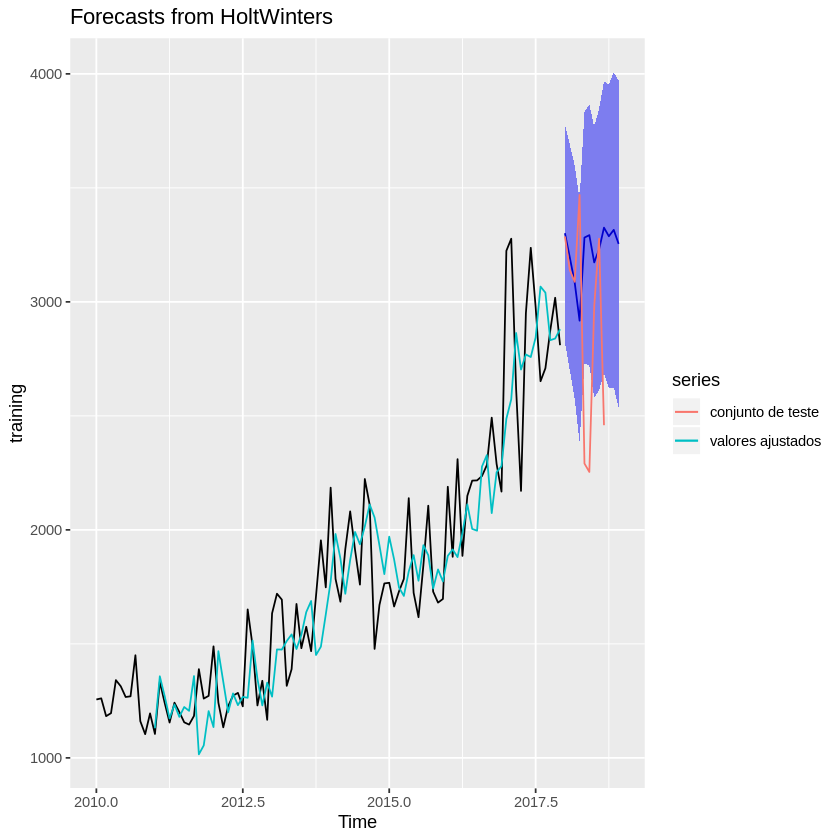

In [14]:

## Modelo de Holt Winters
fit.HW <- HoltWinters(training)
forc.HW <- forecast(object = fit.HW, h = 12, level = 0.95)
accuracy(forc.HW,test)
autoplot(forc.HW) + autolayer(test, series = "conjunto de teste") + 
  autolayer(fitted(forc.HW), series = "valores ajustados")

In [15]:
## Modelo SARIMA
fit_ARIMA <- auto.arima(training)
fit_ARIMA
t_test(fit_ARIMA)
checkresiduals(fit_ARIMA)

Series: training 
ARIMA(3,1,0) with drift 

Coefficients:
          ar1      ar2     ar3    drift
      -0.5152  -0.6006  -0.442  17.4954
s.e.   0.0914   0.0843   0.090   8.3245

sigma^2 estimated as 43835:  log likelihood=-641.04
AIC=1292.07   AICc=1292.75   BIC=1304.84

ERROR: ignored

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.7050212,203.8436,145.6197,-1.396763,8.359611,0.4633178,-0.05268243,NA
Test set,-37.4454026,452.9826,391.4368,-3.837358,14.534321,1.2454335,0.08575852,0.8058501


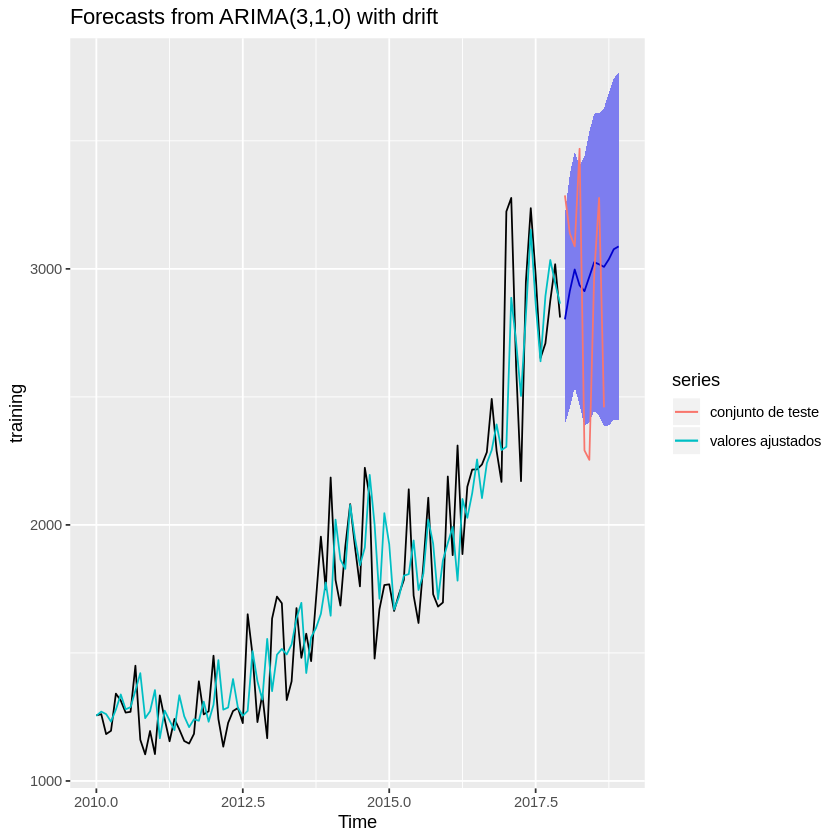

In [16]:

forc.SARIMA <- forecast(object = fit_ARIMA, h = 12, level = 0.95)
autoplot(forc.SARIMA) + autolayer(test, series = "conjunto de teste") + 
  autolayer(fitted(forc.SARIMA), series = "valores ajustados")
accuracy(forc.SARIMA,test)

In [17]:
fit_ARIMA <- auto.arima(training)
fit_ARIMA
t_test(fit_ARIMA)
checkresiduals(fit_ARIMA)

Series: training 
ARIMA(3,1,0) with drift 

Coefficients:
          ar1      ar2     ar3    drift
      -0.5152  -0.6006  -0.442  17.4954
s.e.   0.0914   0.0843   0.090   8.3245

sigma^2 estimated as 43835:  log likelihood=-641.04
AIC=1292.07   AICc=1292.75   BIC=1304.84

ERROR: ignored